In [2]:
import tensorflow as tf
import pandas as pd


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/winequality-white.csv')


In [46]:
df_enum = pd.get_dummies(df)
df_enum

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [19]:
dados = df_enum.drop(columns=['quality'])
alvo = df_enum['quality']

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
dados = scaler.fit_transform(dados)
dados

array([[-0.38461538, -0.62745098, -0.56626506, ..., -0.49090909,
        -0.46511628, -0.74193548],
       [-0.51923077, -0.56862745, -0.59036145, ...,  0.05454545,
        -0.37209302, -0.51612903],
       [-0.17307692, -0.60784314, -0.51807229, ..., -0.01818182,
        -0.48837209, -0.32258065],
       ...,
       [-0.48076923, -0.68627451, -0.77108434, ..., -0.50909091,
        -0.44186047, -0.5483871 ],
       [-0.67307692, -0.58823529, -0.63855422, ...,  0.12727273,
        -0.62790698,  0.5483871 ],
       [-0.57692308, -0.74509804, -0.54216867, ..., -0.01818182,
        -0.76744186,  0.22580645]])

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dados, alvo, test_size=0.10, random_state=42)

In [50]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1)
])

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.R2Score])


In [54]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4473 - r2_score: 0.4414
Epoch 2/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4255 - r2_score: 0.4554
Epoch 3/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4136 - r2_score: 0.4671
Epoch 4/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4355 - r2_score: 0.4467
Epoch 5/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4126 - r2_score: 0.4636
Epoch 6/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4504 - r2_score: 0.4232
Epoch 7/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4147 - r2_score: 0.4652
Epoch 8/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4249 - r2_score: 0.4436
Epoch 9/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4260 - r2_score: 0.4618
Epoch 10/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4108 - r2_score: 0.4754
Epoch 11/200
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4119 - r2_score: 0.4694
Epoch 12/200
138/138 ━━━━━━━━━━━━━━━━━━━━

In [55]:
model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5370 - r2_score: 0.3400 


[0.5478124022483826, 0.3168037533760071]

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


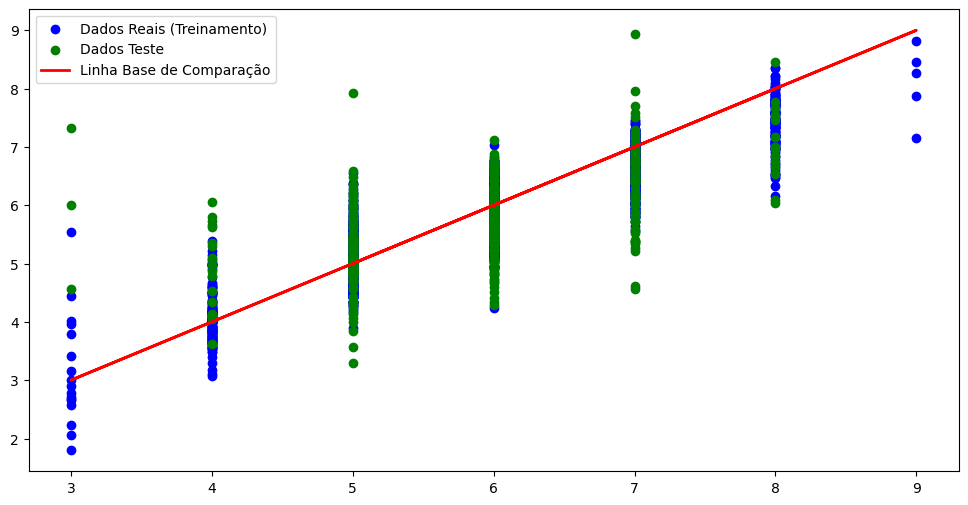

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
plt.scatter(y_train, y_pred_train, color='blue', label='Dados Reais (Treinamento)')
plt.scatter(y_test, y_pred_test, color='green', label='Dados Teste')
plt.plot(y_train, y_train, color='red', linewidth=2, label='Linha Base de Comparação')
plt.legend()
plt.show()